## Week 1: Exploratory data analysis

Shaafe Khan - shaafe.khan@student.hu.nl - Big Data & Design 2022 HU

### Assignment Introduction and background
According to the assginment description, in this assignment data from activity trackers will be explored. Activity trackers are applications that track your activity using your smartphone, a smartwatch, wrist band or a clip on device. For a study, in France, over 900 volunteers received a Fitbit Zip and recorded their daily steps, distance and calories.



### Data cleaning
In this chapter, two data sets are read and merged. following that, the data is cleaned by removing impossible values, variables are created for calculating the mean steps per participant and finally the data is shown via a summarized dataframe.



##### Importing packages and setting up the data.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dfSurvey = pd.read_csv('survey.csv')
dfSteps = pd.read_csv('steps.csv', sep = ";")
dfSurvey = pd.merge(dfSurvey, dfSteps, on = 'id')




#### Cleaning up the data.
Below, impossible weight values are discarded from the dataset.

In [2]:
def below_50(x):
    if(x < 50 or x > 200): 
        return float('NaN')
    else: 
        return x
dfSurvey['weight'] = dfSurvey['weight'].apply(below_50)
dfSurvey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Total steps per participant are calculated by mean and added to a new column named 'meanSteps', followed by rounding them up and discarding outliers.

### Data exploration

Below, mean steps per participant are calculated and round up to whole numbers.

In [3]:

dfSurvey['meanSteps'] =  dfSurvey.loc[:, '20-6-2013':].mean(axis=1).round(0)


C:\Users\Shaafe\AppData\Local\Temp\ipykernel_3916\3669830955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfSurvey['meanSteps'].dropna(), rug=True)


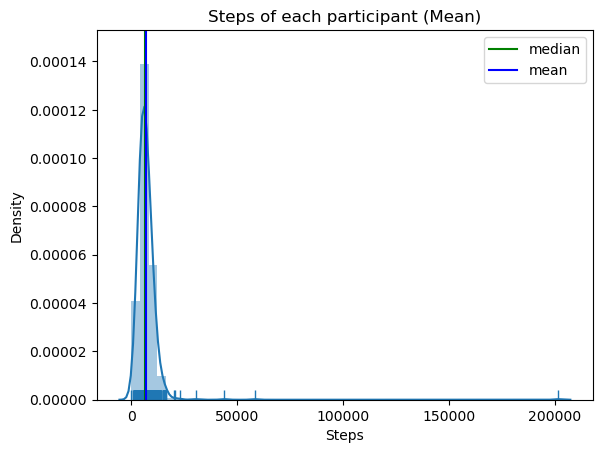

In [4]:

sns.distplot(dfSurvey['meanSteps'].dropna(), rug=True)
plt.title('Steps of each participant (Mean)')
plt.xlabel('Steps')
plt.axvline(dfSurvey['meanSteps'].median(), 0, 100, color='green', label='median')
plt.axvline(dfSurvey['meanSteps'].mean(), 0, 100, color='blue', label='mean')
plt.legend() 
plt.show()

Above, the outliers make it difficult to observe and analyse the data. Thus, outliers above 30,000 steps are discarded in the following histogram.


C:\Users\Shaafe\AppData\Local\Temp\ipykernel_3916\1637133223.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfSurvey['meanSteps'].dropna(), rug=True)


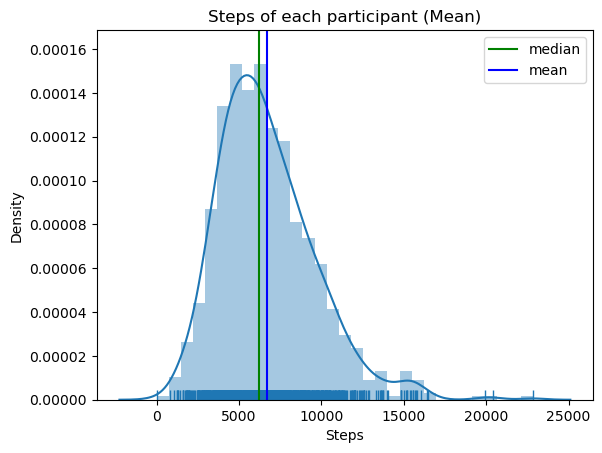

In [5]:

def removeOutliersMeanSteps(x):
    if x > 30000: 
        return float('NaN')
    else: 
        return x

dfSurvey['meanSteps'] = dfSurvey['meanSteps'].apply(removeOutliersMeanSteps)
sns.distplot(dfSurvey['meanSteps'].dropna(), rug=True)
plt.title('Steps of each participant (Mean)')
plt.xlabel('Steps')
plt.axvline(dfSurvey['meanSteps'].median(), 0, 100, color='green', label='median')
plt.axvline(dfSurvey['meanSteps'].mean(), 0, 100, color='blue', label='mean')
plt.legend() 
plt.show()

#### **Summary statistics**

The histogram seems to have no bell curve as it is skewed right and is unimodal. variation density appears to be low. There still appear to be many outliers, mostly beginning after 20,000 steps.




## Relational analysis

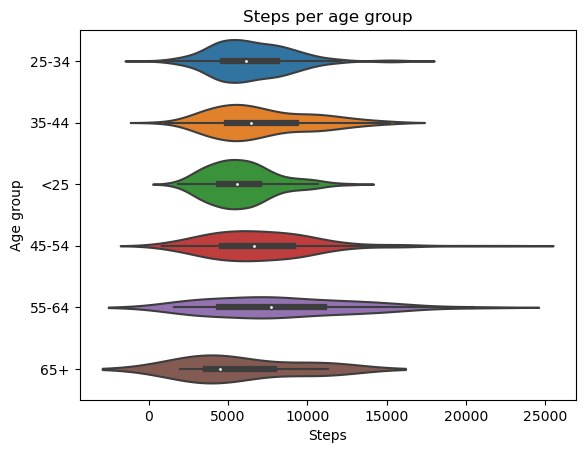

In [6]:
sns.violinplot(y=dfSurvey['age'], x=dfSurvey['meanSteps'], orient='h')
plt.title('Steps per age group')
plt.xlabel('Steps')
plt.ylabel('Age group')
plt.show()

#### Mean steps per age group, analysed

This violin plot shows the relationship of mean steps of participants and their age groups. Out of the age groups displayed, age groups of <25 and 45-54 seem to have more outliers than the rest of the age groups. The interquartile range for 55-64 is the highest, meaning that for this age group, mean step variance is high. Age group 65+ appears to be the one with the least amount of overall steps.

In general, variance in steps increases as the age groups increase.

### Correlation



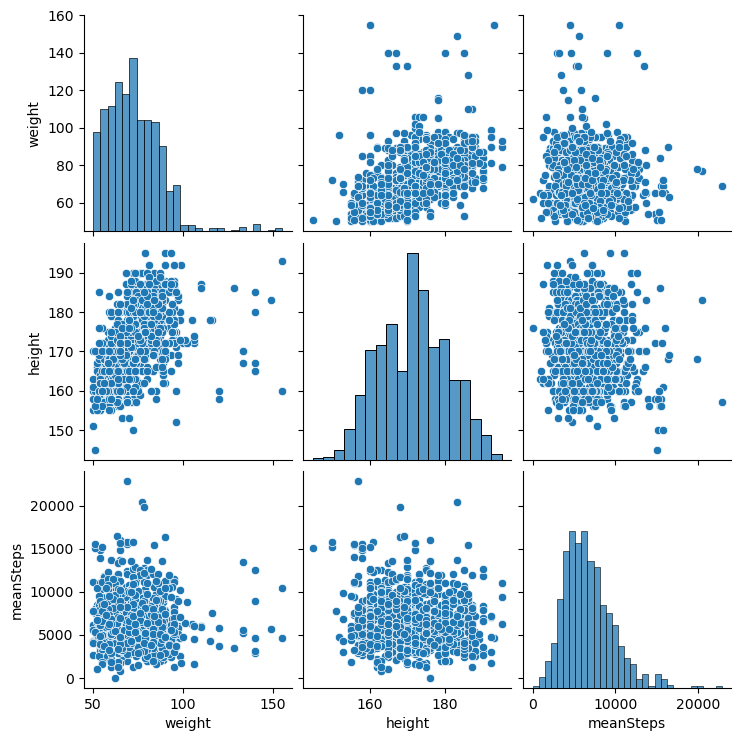

In [31]:
dfSurveySubset = dfSurvey.loc[:, ['weight', 'height', 'meanSteps']]
dfSurveySubset.head()
sns.pairplot(dfSurveySubset)
plt.show() #using Matplotlib to show the plot

displaying an overview of numerical columns using pairplot.

In [32]:
corr = dfSurvey[['weight', 'height', 'meanSteps']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,weight,height,meanSteps
weight,1.000000,0.476915,-0.054786
height,0.476915,1.000000,-0.086251
meanSteps,-0.054786,-0.086251,1.000000


Above, not much correlation is found between the weight, height and steps of each participant. Though, it appears that the height seems to correlate higher with the steps than weight.

### Linear Regression

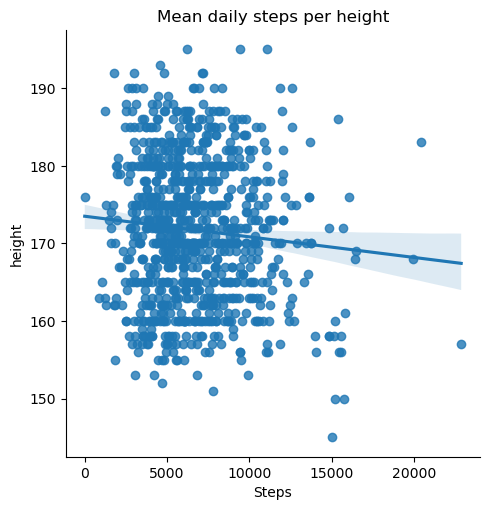

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.lmplot(x='meanSteps', y='height', data=dfSurvey) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Steps')
plt.ylabel('height')
plt.title('Mean daily steps per height')
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression #we need this specific model from sk-learn

#To use sk-learn, we need to create lists of the two variables
#Note that you need to use [[ ]] with x. This creates a Pandas Data Frame (table), rather than a Pandas Series (list).
#lm.fit needs a Data Frame (or matrix) for x, because x can be multiple variables
x = dfSurvey[['meanSteps']].fillna(0)
y = dfSurvey['weight'].fillna(0)
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

dfSurvey['meanSteps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe

Above, predicting the mean steps using height.

### R<sup>2</sup>

In [44]:
from sklearn.metrics import r2_score #we need this function from sklearn
x = dfSurvey['meanSteps'].fillna(0)
y = dfSurvey['meanSteps_p']
r2_score(x, y)

-4.808687425412944

Above, the R2 score shows that the predictions are immensely off.

### RMSE

In [46]:
from sklearn.metrics import mean_squared_error #we need this function from sklearn
from math import sqrt #we need the square root from the math library

sqrt(mean_squared_error(dfSurvey['meanSteps'].fillna(0), dfSurvey['meanSteps_p']))

7227.977545070041

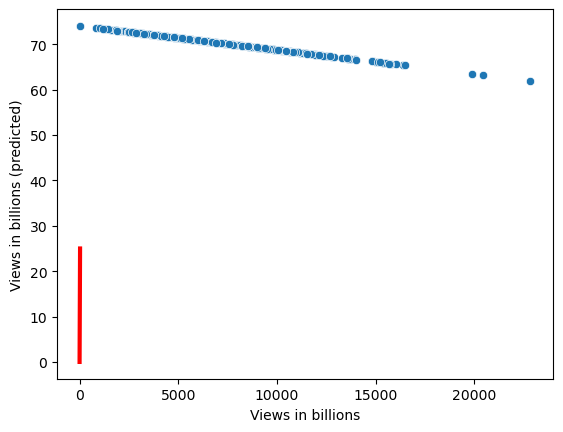

In [48]:
sns.scatterplot(x='meanSteps',y='meanSteps_p',data=dfSurvey)
 #This sets the x-axis limits to (0, 5e10 = 5000000000)
 #Ditto for y-axis. I want both axes to have the same length, so we can compare them
plt.plot([0, 25], [0, 25], color='red', lw=3) #This draws the straight red line, you can leave this out if you wish
plt.xlabel('Views in billions')
plt.ylabel('Views in billions (predicted)')
plt.show()

Since there is no real correlation between the height value and mean steps, the prediction is very inaccurate and unusable.